In [121]:
# Importing the libraries as per the requirement.

import datetime as dt
import pandas as pd
import numpy as np
from scipy.stats import norm
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho


[*********************100%***********************]  1 of 1 completed


(0.1640553717213511, 43203.1015625)

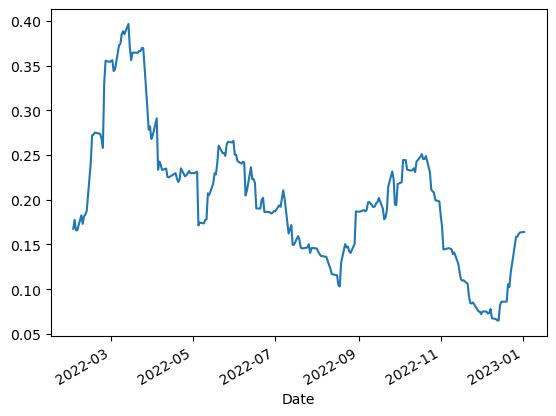

In [122]:
# Selecting the dates

end = dt.datetime.now()
start = dt.datetime(2022,1,1)

# Using Bank Nifty for this example but we can use other tickers as well.

df = pdr.get_data_yahoo(['^NSEBANK'], start, end)

Close = df.Close
Close.tail()
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
TRADING_DAYS = 20
volatility = log_returns.rolling(window=TRADING_DAYS).std()*np.sqrt(252)
volatility.plot()
volatility.iloc[-1], Close.iloc[-1]

For the below codes,
We will compare the values calculated by the funtion and the values pulled directly from the library.

In [123]:
# Defining the Variable Of Black Scholes Model

r = 0.05
S = 43203
K = 43500
T = 40/365
sigma = 0.0925

def blackScholes(r, S, K, T, sigma, type="c"):

    "Calculate BS price of call/put"

    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price, bs(type, S, K, T, r, sigma)
    except:
        print("'c' for Call or 'p' for Put!")

In [124]:
# Price of call option

print("Option Price: ", blackScholes(r, S, K, T, sigma, "c"))

Option Price:  (498.9988838249701, 498.9988838249704)


In [130]:
# Price of put option

print("Option Price: ", blackScholes(r, S, K, T, sigma, "p"))

Option Price:  (558.294558910944, 558.2945589109488)


In [131]:
# Calculation of Delta

def delta_calc(r, S, K, T, sigma, type="c"):
    "Calculate delta of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    try:
        if type == "c":
            delta_calc = norm.cdf(d1, 0, 1)
        elif type == "p":
            delta_calc = -norm.cdf(-d1, 0, 1)
        return delta_calc, delta(type, S, K, T, r, sigma)
    except:
        print("'c' for Call or 'p' for Put!")
print(" Delta: ", [round(x,3) for x in delta_calc(r, S, K, T, sigma, option_type)])

 Delta:  [0.488, 0.488]


In [132]:
# Calculation of Vega

def vega_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        vega_calc = S*norm.pdf(d1, 0, 1)*np.sqrt(T)
        return vega_calc*0.01, vega(type, S, K, T, r, sigma)
    except:
        print("'c' for Call or 'p' for Put!")
print(" Vega : ", [round(x,3) for x in vega_calc(r, S, K, T, sigma, option_type)])

 Vega :  [57.032, 57.032]


In [133]:
# Calculation of Gamma

def gamma_calc(r, S, K, T, sigma, type="c"):
    "Calculate gamma of a option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        gamma_calc = norm.pdf(d1, 0, 1)/(S*sigma*np.sqrt(T))
        return gamma_calc, gamma(type, S, K, T, r, sigma)
    except:
        print("'c' for Call or 'p' for Put!")
print(" Gamma: ", [round(x,3) for x in gamma_calc(r, S, K, T, sigma, option_type)])


 Gamma:  [0.0, 0.0]


In [134]:
# Calculation of Rho

def rho_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            rho_calc = K*T*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            rho_calc = -K*T*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return rho_calc*0.01, rho(type, S, K, T, r, sigma)
    except:
        print("'c' for Call or 'p' for Put!")
print(" Rho : ", [round(x,3) for x in rho_calc(r, S, K, T, sigma, option_type)])    

 Rho :  [22.569, 22.569]


In [135]:
# Calculation of Theta

def theta_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return theta_calc/365, theta(type, S, K, T, r, sigma)
    except:
        print("'c' for Call or 'p' for Put!")
print(" Theta: ", [round(x,3) for x in theta_calc(r, S, K, T, sigma, option_type)])

 Theta:  [-9.415, -9.415]


In [136]:
# Printing all the call values and rounding them till 3 decimal places

option_type='c'
print("Option Price: ", [round(x,3) for x in blackScholes(r, S, K, T, sigma, option_type)])
print(" Delta: ", [round(x,3) for x in delta_calc(r, S, K, T, sigma, option_type)])
print(" Gamma: ", [round(x,3) for x in gamma_calc(r, S, K, T, sigma, option_type)])
print(" Vega : ", [round(x,3) for x in vega_calc(r, S, K, T, sigma, option_type)])
print(" Theta: ", [round(x,3) for x in theta_calc(r, S, K, T, sigma, option_type)])
print(" Rho : ", [round(x,3) for x in rho_calc(r, S, K, T, sigma, option_type)])


Option Price:  [498.999, 498.999]
 Delta:  [0.488, 0.488]
 Gamma:  [0.0, 0.0]
 Vega :  [57.032, 57.032]
 Theta:  [-9.415, -9.415]
 Rho :  [22.569, 22.569]


In [114]:
# Printing all the put values and rounding them till 3 decimal places

option_type='p'
print("Option Price: ", [round(x,3) for x in blackScholes(r, S, K, T, sigma, option_type)])
print(" Delta: ", [round(x,3) for x in delta_calc(r, S, K, T, sigma, option_type)])
print(" Gamma: ", [round(x,3) for x in gamma_calc(r, S, K, T, sigma, option_type)])
print(" Vega : ", [round(x,3) for x in vega_calc(r, S, K, T, sigma, option_type)])
print(" Theta: ", [round(x,3) for x in theta_calc(r, S, K, T, sigma, option_type)])
print(" Rho : ", [round(x,3) for x in rho_calc(r, S, K, T, sigma, option_type)])


Option Price:  [558.295, 558.295]
 Delta:  [-0.512, -0.512]
 Gamma:  [0.0, 0.0]
 Vega :  [57.032, 57.032]
 Theta:  [-3.489, -3.489]
 Rho :  [-24.841, -24.841]
